In [72]:
import numpy as np
import matplotlib.pyplot as plt

## **Generate plots**

In [73]:
def create_plot(function, n_iter=1):

    x=np.linspace(0,1,1001)
    
    f_0= x.copy()
    for i in range(n_iter):
        f_x= [function(x_i) for x_i in f_0]
        f_0=f_x
    
    fig, ax = plt.subplots(figsize = (8, 8))
    ax.plot(x, f_x)
    ax.plot(x, x)
    
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    plt.grid()
    
def generate_orbit(function, x, length= 20):
    
    orbit=[x]
    for i in range(length - 1):
        orbit.append(function(orbit[-1]))
        
    return orbit

def plot_orbit(function, x_point, length= 20): 
    
    x=np.linspace(0,1,1001)
    
    n_iter=1
    
    f_0= x.copy()
    f_x= [function(x_i) for x_i in f_0]
    
    fig, ax = plt.subplots(figsize = (8, 8))
    ax.plot(x, f_x)
    ax.plot(x, x)
    
    orbit= generate_orbit(function, x_point, length)
    ax.scatter(orbit, orbit)
    
    for i in range(length):
        ax.annotate(i, (orbit[i], orbit[i]))
        
    plt.rcParams.update({'font.size': 15})

    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    plt.grid()

**1) Define function on unit interval**

In [107]:
def f(x):
    
    if 0 <= x < 1/4:
        return 5/8 - 5/2 * x
    
    if 1/4 <= x < 3/4:
        
        return (x - 1/4) * 2
    
    else:
        return (x- 3/4)* (-2) + 1 

In [114]:
def f1(x):
    
    if 0 <= x < 1/4:
        return 5/8 - 5/2 * x
    
    if 1/4 <= x < 3/4:
        
        return (x - 1/4) * 2
    
    else:
        return (x- 3/4)* (-1.5) + 1 

**2) Generate plot of $f^n$**

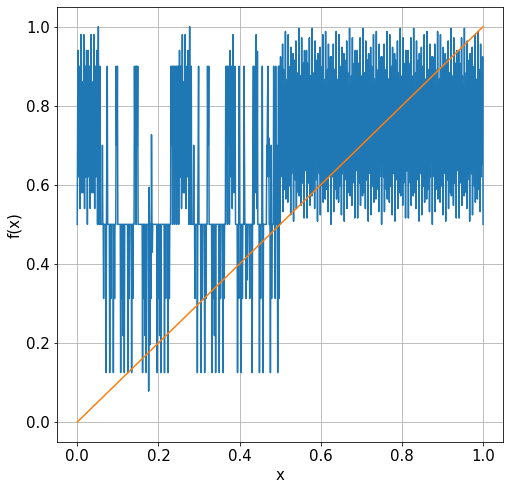

In [132]:
'''Generate plot of f and define n'''

create_plot(f, n_iter=20)

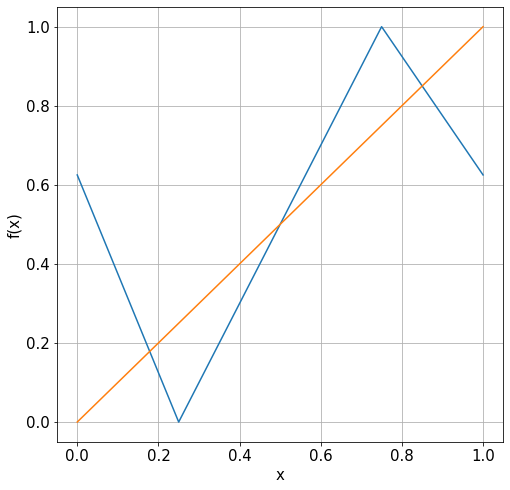

In [116]:
'''Generate plot of f and define n'''

create_plot(f1, n_iter=1)

**3) Plot Orbits**

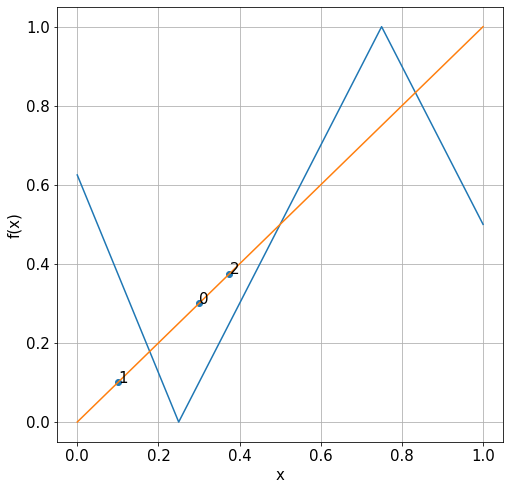

In [127]:
plot_orbit(f, 0.3, length= 3)

## **Calculates h inverse**

Cardinality can be in principle found by moving partitions by $\epsilon$ and seeing if symbolic representation changes

In [148]:
'''Finds a h inverse'''

def h_inverse(function, x , partitions, length=10):
    
    partitions_mod= partitions.copy()
    partitions_mod[-1]+= 1e-10
    
    orbit= generate_orbit(function, x, length)
    
    symbolic= [partitions_mod.index(max(i for i in partitions_mod if o >= i)) for o in orbit]
        
    return ''.join(str(i) for i in symbolic)

**Test on Tent Map**

In [158]:
def t(x):
    
    if 0 <= x < 1/2:
        return 2*x
    
    else:
        return 2-2*x

partition= [0, 0.5 , 1]

print(h_inverse(t, 1/7 , partition, length=20))

00110110110110110110


In [160]:
'''Beware of floating point errors'''
print(h_inverse(t, 0.8 , partition, length=200))

10101010101010101010101010101010101010101010101010111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


**Estimating topological entropy**

Estimates entropy via:

$$ h_{\text{top}} (f) =  \lim_ {n \to \infty} \frac{1}{n} \log \text{Var} (f^n)$$

Very inefficient as the number of partition has to scale with $h_{\text{top}}^n$

In [102]:
def var(array):
    
    return np.sum(np.abs([array[i+1] - array[i] for i in range(len(array)-1)]))


def entr_est(function, n_iter=5, partition=1000):
    
    x=np.linspace(0,1,partition+ 1)
    
    f_0= x.copy()
    for i in range(n_iter):
        f_x= [function(x_i) for x_i in f_0]
        f_0=f_x
        
    return np.log(var(f_x))/n_iter

Note the slow convergence for f.  

True $h_{\text{top}} = \ln \frac{1}{2}(1 +\sqrt{5})  =  0.481$

Estimates for n= 1, 10 , 20

0.75377 -> 0.7416 -> 0.588

In [142]:
print(entr_est(f, n_iter= 1, partition=1000000))
print(entr_est(f, n_iter= 10, partition=1000000))
print(entr_est(f, n_iter= 20, partition=1000000))

0.7537718023763802
0.7416257918893085
0.5882234356554511
